#Predict if the client will subscribe a bank term deposit

- 홍수지

##1. 라이브러리 및 데이터 불러오기

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


##2. 데이터 탐색: 시각화 및 통계량 확인 등

In [ ]:
train.shape, test.shape

((32950, 21), (8238, 20))

In [ ]:
# 데이터 확인(train)
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12224,46,admin.,married,high.school,unknown,no,no,telephone,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,36387,32,admin.,married,university.degree,no,yes,yes,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,22703,36,technician,single,university.degree,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,32742,30,services,single,high.school,no,yes,yes,cellular,may,...,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,40547,76,retired,divorced,basic.4y,no,no,no,cellular,aug,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes


In [ ]:
# 데이터 확인(test)
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24188,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,8688,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,35789,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,20034,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,11392,43,services,married,high.school,unknown,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.conf.idx   8238 non-null   f

In [ ]:
# 기초 통계값 확인
train.describe()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,20569.615569,40.023703,2.567830,962.415964,0.172838,0.083129,93.576610,-40.500091,3.622516,5167.036495
std,11895.520420,10.401749,2.766994,187.054556,0.498098,1.571951,0.578725,4.632363,1.734791,72.250873
min,1.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10258.250000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20571.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30846.750000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# 기초 통계값 확인
test.describe()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,20694.031682,40.025492,2.566642,962.713401,0.173464,0.076912,93.571882,-40.512637,3.616390,5167.033576
std,11868.573076,10.499522,2.782228,186.346378,0.481933,1.567072,0.579322,4.611767,1.733168,72.258533
min,4.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,10457.750000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,20694.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,31056.250000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41181.000000,94.000000,43.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
cols_n = train.select_dtypes(exclude = 'O').columns
train[cols_n].corr()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,1.000000,0.005511,-0.092603,-0.285440,0.425994,-0.834225,-0.737172,-0.258277,-0.850356,-0.757933
age,0.005511,1.000000,0.009295,-0.037567,0.024884,-0.000794,0.001814,0.126383,0.009285,-0.019196
campaign,-0.092603,0.009295,1.000000,0.050462,-0.077091,0.150431,0.127395,-0.014049,0.135103,0.144648
pdays,-0.285440,-0.037567,0.050462,1.000000,-0.593335,0.272499,0.078061,-0.094547,0.298507,0.375373
previous,0.425994,0.024884,-0.077091,-0.593335,1.000000,-0.417741,-0.198063,-0.047646,-0.451619,-0.500971
emp.var.rate,-0.834225,-0.000794,0.150431,0.272499,-0.417741,1.000000,0.775472,0.196234,0.972352,0.907312
cons.price.idx,-0.737172,0.001814,0.127395,0.078061,-0.198063,0.775472,1.000000,0.058054,0.688765,0.522767
cons.conf.idx,-0.258277,0.126383,-0.014049,-0.094547,-0.047646,0.196234,0.058054,1.000000,0.278391,0.102114
euribor3m,-0.850356,0.009285,0.135103,0.298507,-0.451619,0.972352,0.688765,0.278391,1.000000,0.945236
nr.employed,-0.757933,-0.019196,0.144648,0.375373,-0.500971,0.907312,0.522767,0.102114,0.945236,1.000000


In [ ]:
print(train.nunique())
print(test.nunique())

id                32950
age                  76
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
campaign             42
pdays                26
previous              8
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           313
nr.employed          11
y                     2
dtype: int64
id                8238
age                 73
job                 12
marital              4
education            8
default              2
housing              3
loan                 3
contact              2
month               10
day_of_week          5
campaign            34
pdays               22
previous             6
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          269
nr.employed         11
dtype: int64


### 시각화

In [ ]:
# target
y = pd.Series(train['y'])

In [ ]:
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

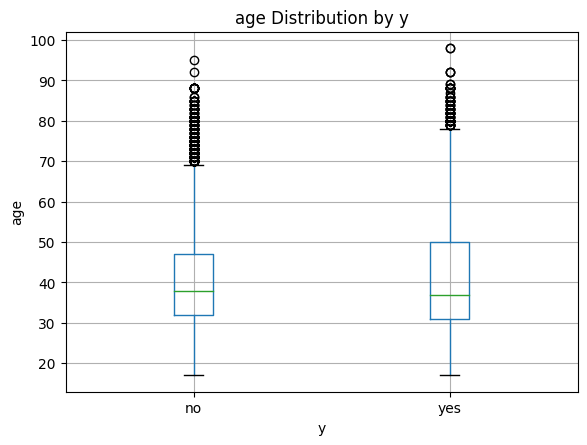

In [ ]:
# Boxplot

target = "y"
var = "age"

train.boxplot(column=var, by=target)
plt.ylabel(var)
plt.xlabel(target)
plt.title("{} Distribution by {}".format(var, target))
plt.suptitle("")  # Suppress the automatic "Boxplot grouped by Survived" title
plt.show()

In [ ]:
# # 상관관계 --인코딩 후 실행
# plt.figure(figsize=(15,8))
# v = round(train.corr(),2)
# sns.heatmap(v,annot=True,cmap="Blues", linewidths=.5);

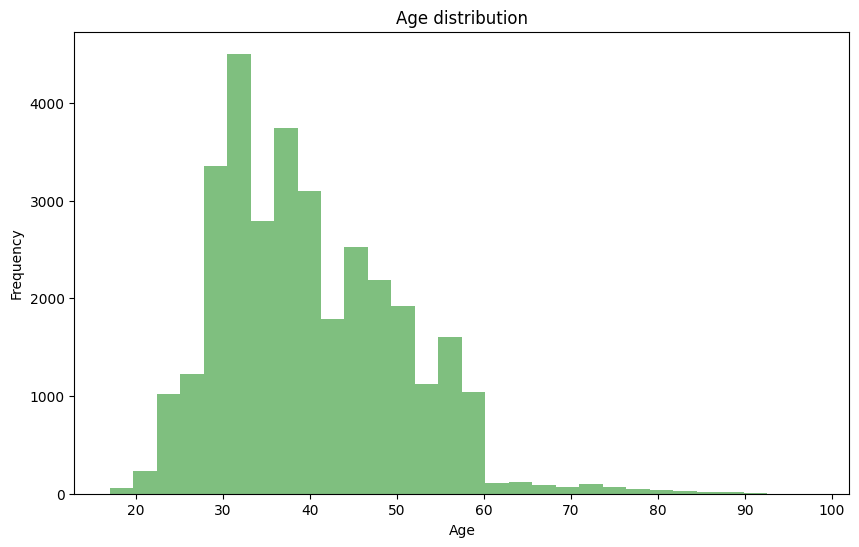

In [ ]:
# 'age' 변수의 분포 히스토그램

plt.figure(figsize=(10, 6))
plt.hist(train.age, bins=30, color='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

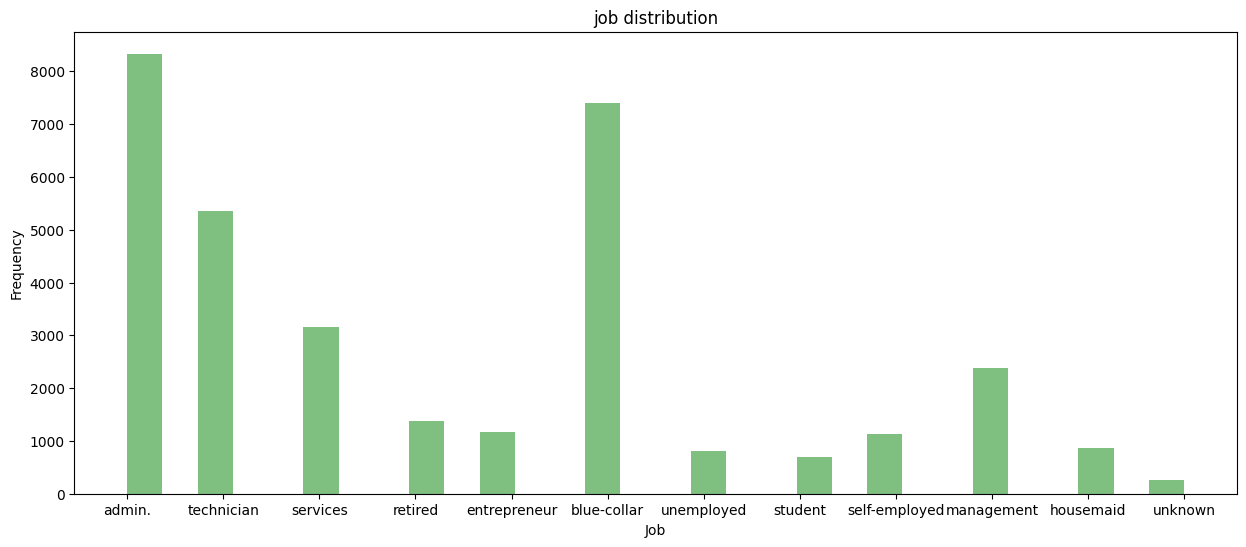

In [ ]:
# 'job' 변수의 분포 히스토그램
plt.figure(figsize=(15, 6))
plt.hist(train.job, bins=30, color='green', alpha=0.5)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('job distribution')
plt.show()


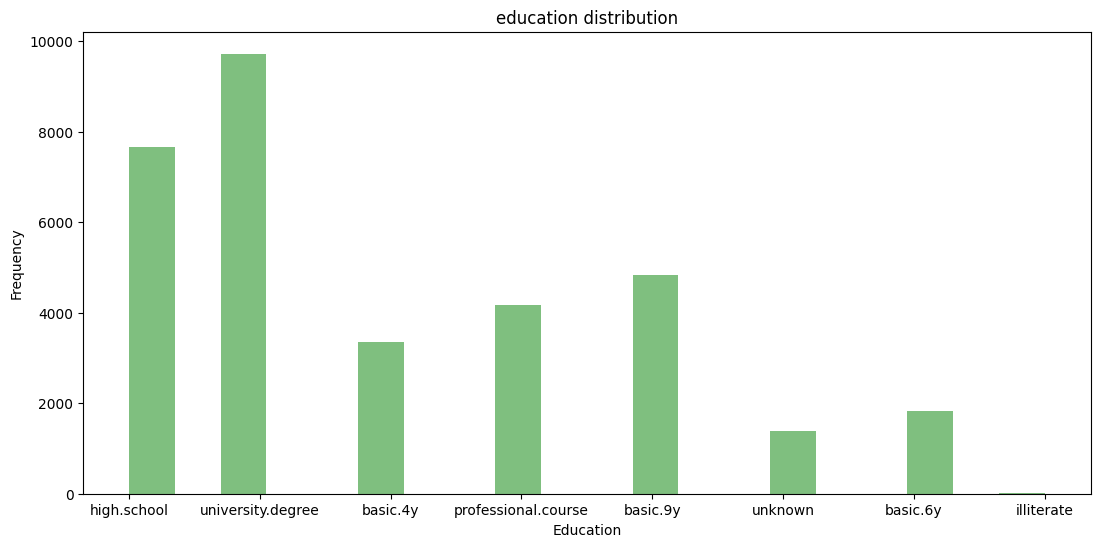

In [ ]:
# 'education' 변수의 분포 히스토그램
plt.figure(figsize=(13, 6))
plt.hist(train.education, bins=20, color='green', alpha=0.5)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('education distribution')
plt.show()

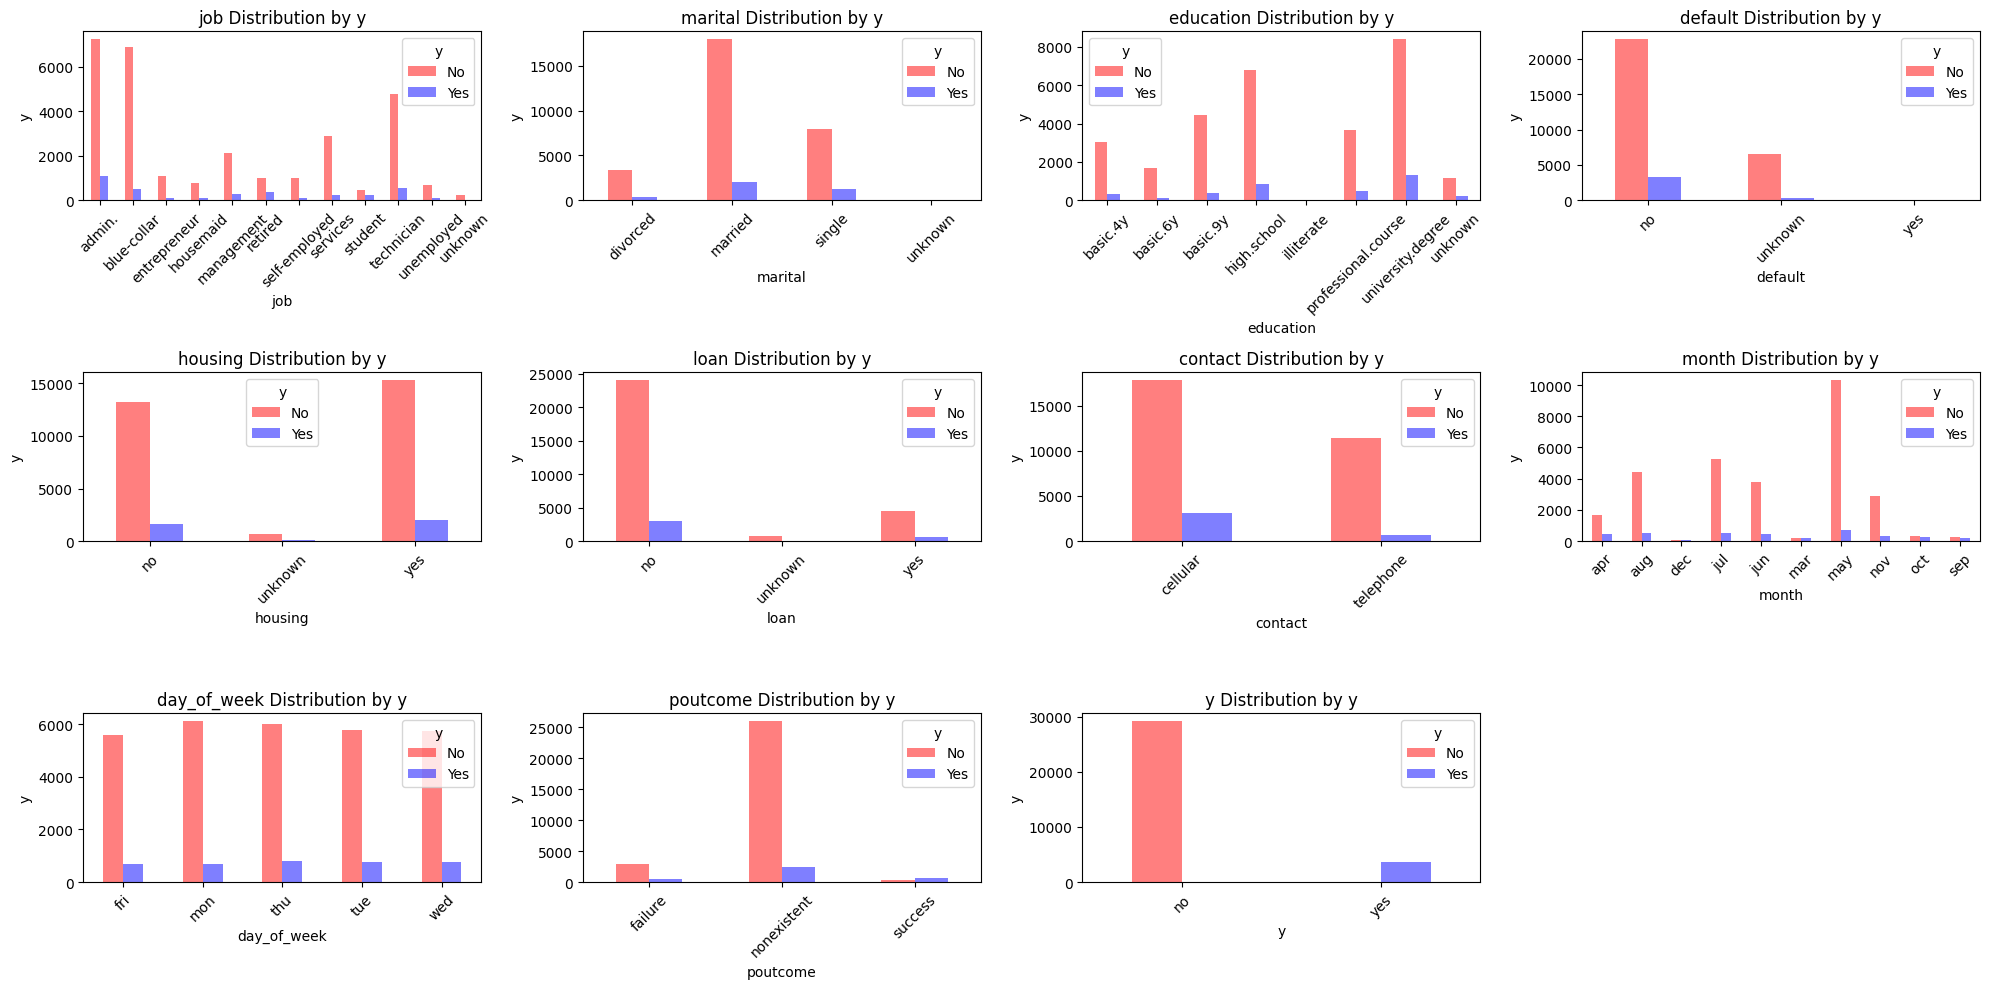

In [ ]:
# "job" 변수의 분포가 "y" 변수에 따라 어떻게 달라지는지를 나타내는 바 그래프

vars = train.select_dtypes(include ='object').columns
target = "y"
plt.figure(figsize=(20, 10))

for i, var in enumerate(vars):

    plt.subplot(3,4, i + 1)  # 3행 4열의 그리드에 서브플롯 배치
    # crosstab을 사용하여 분포 계산
    var_counts = pd.crosstab(train[var], train[target])
    var_counts.plot(kind="bar", stacked=False, color=["red", "blue"], alpha=0.5, ax=plt.gca())

    plt.title(f"{var} Distribution by {target}")
    plt.xlabel(var)
    plt.ylabel(target)
    plt.legend(title=target, labels=["No", "Yes"])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 03. 데이터 전처리: 정규화, 인코딩, 결측치/이상치 처리

In [ ]:
# 결측치 확인(train)
train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# 결측치 확인(test)
test.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [ ]:
# 이상치처리
from scipy.stats.mstats import winsorize

feature_with_outliers = ["age"]

# Define the percentile thresholds for Winsorization
lower_percentile = 0.0
upper_percentile = 0.0002

# Apply Winsorization to each input variable
for feature in train.columns:
    if feature in feature_with_outliers:
      train[feature] = winsorize(train[feature], limits=(lower_percentile, upper_percentile))

In [ ]:
# target값 분리
target = train.pop('y')
target = target.replace({'no': 0, 'yes': 1})

In [ ]:
target.value_counts(normalize=True)

y
0    0.887344
1    0.112656
Name: proportion, dtype: float64

In [ ]:
# 의미 없는 'id' 값 처리
train = train.drop('id', axis=1)
test_id = test.pop('id')

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = train.select_dtypes(include='object').columns
for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

In [ ]:
# # One-Hot Encoder
# df= pd.concat([train,test])
# df = pd.get_dummies(df)
# train = df[:32950]
# test = df[32950:]
# # train = pd.get_dummies(train)
# # test = pd.get_dummies(test)

In [ ]:
# # 의미없는 변수를 삭제 --성능이 떨어짐
# train = train.drop('day_of_week', axis=1)
# test = test.drop('day_of_week', axis=1)

In [ ]:
# # 상관관계가 높은 변수를 삭제 --성능이 떨어짐
# train = train.drop(['nr.employed','euribor3m'],axis=1)
# test = test.drop(['nr.employed','euribor3m'], axis=1)

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.2, random_state=2024)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((26360, 19), (6590, 19), (26360,), (6590,))

In [ ]:
# StandatdScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tr)

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_tr, y_tr = smote.fit_resample(X_tr, y_tr)

In [ ]:
train.shape, test.shape

((32950, 19), (8238, 19))

## 04. 모형 학습 및 검증

In [ ]:
# 평가 라이브러리(accuracy_score, F-1 score, roc_auc_score)
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_predict = lr.predict(X_val)
y_pred = (y_predict>0.5).astype(int)
# print(y_pred)

# 평가
# f1_score:0.30912863070539415
print(f1_score(y_val,y_pred))

# roc_auc_score:0.7646185174264287
print(roc_auc_score(y_val, y_predict ))

# accuracy_score:0.898937784522003
print(accuracy_score(y_val, y_pred))

0.40755040755040756
0.771399706877026
0.7904400606980273


In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_tr,y_tr)
y_predict = log.predict(X_val)
y_pred = log.predict_proba(X_val)[:,1]

# 평가
# f1_score:0.29559748427672955
print(f1_score(y_val,y_predict))

# roc_auc_score: 0.7543454667549198
print(roc_auc_score(y_val, y_pred ))

# accuracy_score:0.8980273141122913
print(accuracy_score(y_val, y_predict))

0.41330376940133035
0.7727340418780491
0.7992412746585736


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
dtc.fit(X_tr, y_tr)
y_predict = dtc.predict(X_val)
y_pred = dtc.predict_proba(X_val)[:,1]

# 평가
# f1_score:0.328732747804266
# f1_score(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0): 0.3730084348641049
print(f1_score(y_val, y_predict))
# roc_auc_score: 0.6220088294303348
# roc_auc_score(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0):0.7704943798240483
print(roc_auc_score(y_val, y_pred ))
# accuracy_score: 0.8333839150227618
# accuracy_score(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0):0.8984825493171472
print(accuracy_score(y_val, y_predict))

0.4754760530871321
0.7647237933421174
0.8620637329286798


In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier()
bag = BaggingClassifier(estimator=base_model,
                          n_estimators=300,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=2024)
bag.fit(X_tr,y_tr)
y_predict = bag.predict(X_val)
y_pred = bag.predict_proba(X_val)[:,1]

# 평가
# f1_score:0.328732747804266
# f1_score(estimator=base_model,n_estimators=100, bootstrap=True,n_jobs=-1, random_state=2024): 0.2799145299145299
print(f1_score(y_val, y_predict))
# roc_auc_score: 0.6220088294303348
# roc_auc_score(max_depth=3, min_samples_split=2, min_impurity_decrease=0.0): 0.7373143667143901
print(roc_auc_score(y_val, y_pred ))
# accuracy_score: 0.8333839150227618
# accuracy_score(max_depth=3, min_samples_split=2, min_impurity_decrease=0.0):0.8977238239757208
print(accuracy_score(y_val, y_predict))


0.4116766467065869
0.76396223263755
0.8807283763277693


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9, min_samples_split=2, bootstrap=True,n_jobs=-1, random_state=2024)
rf.fit(X_tr,y_tr)

y_predict = rf.predict(X_val)
y_pred = rf.predict_proba(X_val)[:,1]

# 평가
# f1_score: 0.36094158674803833
# f1_score((max_depth=9, min_samples_split=2, bootstrap=True,n_jobs=-1, random_state=2024): 0.36084452975047987
print(f1_score(y_val, y_predict))
# roc_auc_score: 0.7660195233555592
# roc_auc_score((max_depth=9, min_samples_split=2, bootstrap=True,n_jobs=-1, random_state=2024): 0.7866949571347172
print(roc_auc_score(y_val, y_pred ))
# accuracy_score: 0.8887708649468892
# accuracy_score((max_depth=9, min_samples_split=2, bootstrap=True,n_jobs=-1, random_state=2024):0.898937784522003
print(accuracy_score(y_val, y_predict))


0.48041474654377875
0.7821346427411968
0.8631259484066768


In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=2024)
ada.fit(X_tr,y_tr)

y_predict = ada.predict(X_val)
y_pred = ada.predict_proba(X_val)[:,1]

# 평가
# f1_score: 0.30443548387096775
# f1_score(n_estimators=100, random_state=2024):0.33070866141732286
print(f1_score(y_val, y_predict))
# roc_auc_score: 0.7787547016178124
# roc_auc_score(n_estimators=100, random_state=2024): 0.7820928302175557
print(roc_auc_score(y_val, y_pred ))
# accuracy_score: 0.8952959028831563
# accuracy_score(n_estimators=100, random_state=2024):0.8968133535660091
print(accuracy_score(y_val, y_predict))

0.444305381727159
0.7707344868091226
0.8652503793626707


In [ ]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_tr,y_tr)

y_predict = gb.predict(X_val)
y_pred = gb.predict_proba(X_val)[:,1]

# 평가
# f1_score: 0.3655502392344498
# f1_score(n_estimators=50,subsample=1.0, random_state=2024):0.34604105571847504
print(f1_score(y_val, y_predict))

# roc_auc_score:0.7859298452295118
# roc_auc_score(n_estimators=50,subsample=1.0, random_state=2024):0.7815021853630506
print(roc_auc_score(y_val, y_pred ))

# accuracy_score: 0.8993930197268589
# accuracy_score(n_estimators=50,subsample=1.0, random_state=2024):0.8984825493171472
print(accuracy_score(y_val, y_predict))

0.45545880776959147
0.7812262227070185
0.8766312594840667


In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, subsample=1.0, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=2024)
xgb.fit(X_tr,y_tr)

y_predict = xgb.predict(X_val)
y_pred = xgb.predict_proba(X_val)[:,1]

# 평가
# f1_score:0.3599290780141844
# f1_score(n_estimators=50, subsample=1.0, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=2024):0.3691148775894539
print(f1_score(y_val, y_predict))

# roc_auc_score:0.7684264355041249
# roc_auc_score(n_estimators=50, subsample=1.0, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=2024):0.7919623041197822
print(roc_auc_score(y_val, y_pred ))

# accuracy_score:0.8904400606980273
# accuracy_score(n_estimators=50, subsample=1.0, learning_rate=0.1, max_depth=6, n_jobs=-1, random_state=2024):0.8983308042488619
print(accuracy_score(y_val, y_predict))

0.4795713328868051
0.7847617293293202
0.8820940819423368


In [ ]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=50,
                      data_sample_strategy="goss", # 선택 goss를 사용안해도 됨
                      top_rate=0.2,
                      other_rate=0.1,
                      force_col_wise=True,
                      verbosity=0,
                      n_jobs=-1,
                      random_state=2024)
lgbm.fit(X_tr,y_tr)

y_predict = lgbm.predict(X_val)
y_pred = lgbm.predict_proba(X_val)[:,1]

# 튜닝--n_estimators=50,data_sample_strategy="goss", top_rate=0.2,other_rate=0.1,force_col_wise=True,verbosity=0,n_jobs=-1,random_state=2024
# f1_score:0.368271954674221
# f1_score():0.3779232927970065
print(f1_score(y_val, y_predict))

# roc_auc_score:0.7865253013881071
# roc_auc_score():0.7931400426281543
print(roc_auc_score(y_val, y_pred ))

# accuracy_score:0.8984825493171472
# accuracy_score():0.8990895295902883
print(accuracy_score(y_val, y_predict))

0.4540778839088905
0.786154601863441
0.8872534142640364


In [ ]:
train.shape, test.shape


((32950, 19), (8238, 19))

In [ ]:
# 예측
y_predict = rf.predict(test)
y_pred_prob = rf.predict_proba(test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#  예측 csv
pd.DataFrame({'id':test_id, 'y_predict':y_predict, 'y_predict_prob':y_pred_prob}).to_csv('result.csv',index=False)

In [ ]:
result = pd.read_csv('result.csv')
test = pd.read_csv("test.csv")

prediction = pd.merge(test, result, on='id')

In [ ]:
prediction.to_csv('prediction.csv',index=False)

In [ ]:
prediction = pd.read_csv('prediction.csv')
prediction['y_predict'].value_counts(normalize = True)

y_predict
0    0.619082
1    0.380918
Name: proportion, dtype: float64

In [ ]:
prediction['y_predict'].value_counts()

y_predict
0    5100
1    3138
Name: count, dtype: int64